In [29]:
%reload_ext autoreload
%autoreload 2

In [30]:
import numpy as np 
import os


In [31]:
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Construct the path to the project's root directory
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Add the project's root directory to the Python path
import sys
sys.path.append(project_root)

In [32]:
from src.percolation import FireSimulation
from src.visualization import visualize_fire_sequence

In [33]:
# Parameter

N = 30 # NxN is the dimension of the matrix
p = 0.6 # The density of the trees

In [34]:
simulation = FireSimulation(N=N, p=p)
configs = simulation.simulate_fire_spread(10)

invalid command name "140153403125440animate"
    while executing
"140153403125440animate"
    ("after" script)


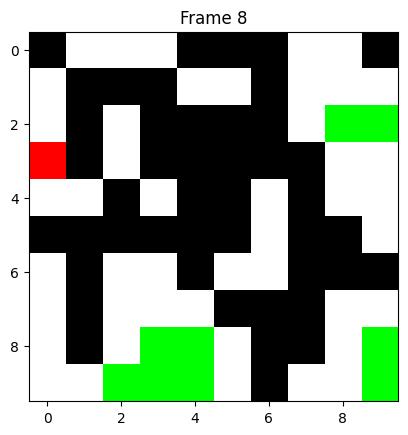

In [35]:
visualize_fire_sequence(configs)